## DLL assignment for the Junior Model Developer position

#### Author: Chao Fu 

#### Date: 2022-06-17

* Load a few packages and functions that are useful for solving this assignment.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

* Read and Propress the data

In [3]:
# Read the data as backup
train_data_backup = pd.read_csv('train.csv')
test_data_backup = pd.read_csv('test.csv')

In [4]:
# The columns names
train_data_backup.columns.values

array(['personal_credit_%', 'age', 'A30-60_Counter', 'expense_ratio',
       'income', 'num_loans', 'A90+_Counter', 'num_home_loans',
       'A60-90_Counter', 'num_dependents', 'PD_2years'], dtype=object)

In [5]:
# Change the columns names
col_names = ['personal_credit_percentage', 'age', 'A30_60_Counter',
             'expense_ratio', 'income', 'num_loans', 'A90_more_Counter',
             'num_home_loans', 'A60_90_Counter', 'num_dependents', 'PD_2years']
train_data_backup.columns = col_names
test_data_backup.columns = col_names

In [6]:
# Change the value of 'PD_2years' from 1(default) and 0(not default) to 1 (not default) and 0 (default)
train_data_backup['PD_2years'] = np.where(train_data_backup['PD_2years'] == 0, 1, 0)
test_data_backup['PD_2years'] = np.where(test_data_backup['PD_2years'] == 0, 1, 0)

In [378]:
# Copy the data to be used in following steps
train_data = train_data_backup.copy()
test_data = test_data_backup.copy()

In [379]:
# Overview of the train data to find the columns with missing data and outlier
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   personal_credit_percentage  120000 non-null  float64
 1   age                         120000 non-null  int64  
 2   A30_60_Counter              120000 non-null  int64  
 3   expense_ratio               120000 non-null  float64
 4   income                      96311 non-null   float64
 5   num_loans                   120000 non-null  int64  
 6   A90_more_Counter            120000 non-null  int64  
 7   num_home_loans              120000 non-null  int64  
 8   A60_90_Counter              120000 non-null  int64  
 9   num_dependents              116873 non-null  float64
 10  PD_2years                   120000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 10.1 MB


,personal_credit_percentage,age,A30_60_Counter,expense_ratio,income,num_loans,A90_more_Counter,num_home_loans,A60_90_Counter,num_dependents,PD_2years
count,120000.000000,120000.000000,120000.000000,120000.000000,9.631100e+04,120000.000000,120000.000000,120000.000000,120000.000000,116873.000000,120000.000000
mean,5.632938,52.280558,0.422292,351.040018,6.678384e+03,8.460858,0.265758,1.019942,0.239683,0.757831,0.932750
std,247.022022,14.762852,4.191649,1941.106682,1.529405e+04,5.146114,4.167864,1.132330,4.153510,1.115977,0.250456
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030097,41.000000,0.000000,0.175554,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.154848,52.000000,0.000000,0.367165,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.558904,63.000000,0.000000,0.866549,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000,1.000000


In [10]:
# Overview of the test data to find the columns with the missing data and outlier
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   personal_credit_percentage  30000 non-null  float64
 1   age                         30000 non-null  int64  
 2   A30_60_Counter              30000 non-null  int64  
 3   expense_ratio               30000 non-null  float64
 4   income                      23958 non-null  float64
 5   num_loans                   30000 non-null  int64  
 6   A90_more_Counter            30000 non-null  int64  
 7   num_home_loans              30000 non-null  int64  
 8   A60_90_Counter              30000 non-null  int64  
 9   num_dependents              29203 non-null  float64
 10  PD_2years                   30000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.5 MB


,personal_credit_percentage,age,A30_60_Counter,expense_ratio,income,num_loans,A90_more_Counter,num_home_loans,A60_90_Counter,num_dependents,PD_2years
count,30000.000000,30000.000000,30000.000000,30000.000000,23958.000000,30000.000000,30000.000000,30000.000000,30000.000000,29203.000000,30000.000000
mean,7.710437,52.353800,0.416000,360.865307,6637.405793,8.420367,0.266833,1.011433,0.243200,0.754785,0.934800
std,260.399638,14.807966,4.197372,2385.799810,9921.016878,5.145257,4.175126,1.119469,4.161918,1.111530,0.246883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029021,41.000000,0.000000,0.172965,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.151134,52.000000,0.000000,0.363785,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.559883,63.000000,0.000000,0.875993,8207.750000,11.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,22000.000000,102.000000,98.000000,329664.000000,835040.000000,54.000000,98.000000,29.000000,98.000000,20.000000,1.000000


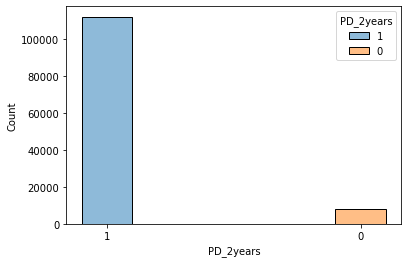

In [380]:
# Check the balance of the train data
sns.histplot(x = train_data['PD_2years'].astype('str'), 
             hue = train_data['PD_2years'].astype('str'), shrink = 0.2)
plt.show()

In [381]:
# Check the outlier
# There is an outlier in the test data. The age is 0 which means an infant. 
# But he/she has income which does not make sense
# This sample shoule be removed
test_data.query('age < 21')

,personal_credit_percentage,age,A30_60_Counter,expense_ratio,income,num_loans,A90_more_Counter,num_home_loans,A60_90_Counter,num_dependents,PD_2years
7568,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,1


In [382]:
test_data.drop([7568], axis = 0, inplace = True)

In [383]:
# Solve the missing data : num_dependents
# num_dependents is integer. Hence, using the mode to replace the missing data
train_data.groupby(['num_dependents']).size()

num_dependents
0.0     69571
1.0     20994
2.0     15565
3.0      7626
4.0      2327
5.0       596
6.0       126
7.0        38
8.0        21
9.0         3
10.0        5
13.0        1
dtype: int64

In [384]:
test_data.groupby(['num_dependents']).size()

num_dependents
0.0     17331
1.0      5322
2.0      3956
3.0      1857
4.0       535
5.0       150
6.0        32
7.0        13
8.0         3
9.0         2
20.0        1
dtype: int64

In [385]:
train_data.fillna(0, inplace = True)
test_data.fillna(0, inplace = True)

In [386]:
# Transform the num_dependents from float64 into int64
train_data['num_dependents'] = train_data['num_dependents'].astype('int64')
test_data['num_dependents'] = test_data['num_dependents'].astype('int64')

In [387]:
# Solve the missing data : income
# income is float64. Hence, using median to replace the missing data
train_data.fillna(5400, inplace = True)
test_data.fillna(5400, inplace = True)

In [388]:
# Transform the continus independent variables into dummy_variables
# Function of weight of evidence and ploting the weight of evidence

total_not_default = train_data['PD_2years'].sum()
total_default = train_data.shape[0] - total_not_default

def my_woe(d):
    n_not_default = d['PD_2years'].sum()
    n_default = d.shape[0] - n_not_default
    r_not_default = n_not_default / total_not_default
    r_default = n_default / total_default
    if r_default != 0 and r_not_default != 0:
        return np.log(r_not_default / r_default)
        

def woe_continuous(df, discrete_name):
    N = df.shape[0]
    woe_values = df.groupby([discrete_name]).apply(my_woe).values
    df1 = df.groupby([discrete_name], as_index = False)['PD_2years'].count().eval('woe = @woe_values')
    df1.eval('Number_rate = PD_2years / @N', inplace = True)
    num_not_default = df.groupby([discrete_name], as_index = False)['PD_2years'].sum()['PD_2years'].values
    df1.eval('Number_not_default = @num_not_default', inplace = True)
    df1.rename(columns = {'PD_2years' : 'total_number'}, inplace = True)
    return df1

def plot_woe_discrete(df_woe, discrete_name, rotation_xaxis_label = None):
    if rotation_xaxis_label == None:
        rotation_xaxis_label = 0
    x = df_woe.iloc[:, 0].astype('str').values
    y = df_woe['woe']
    plt.figure(figsize = (20, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(discrete_name)
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + discrete_name))
    plt.xticks(rotation = rotation_xaxis_label)


,num_loans_factor,total_number,woe,Number_rate,Number_not_default
0,"(-0.058, 3.867]",17584,-0.509457,0.146533,15700
1,"(3.867, 7.733]",41057,0.124591,0.342142,38600
2,"(7.733, 11.6]",33500,0.193926,0.279167,31622
3,"(11.6, 15.467]",16754,0.035467,0.139617,15664
4,"(15.467, 19.333]",7031,0.029475,0.058592,6571
5,"(19.333, 23.2]",2576,-0.154864,0.021467,2376
6,"(23.2, 27.067]",935,0.104875,0.007792,878
7,"(27.067, 30.933]",273,-0.092063,0.002275,253
8,"(30.933, 34.8]",168,0.028630,0.001400,157
9,"(34.8, 38.667]",55,-0.084189,0.000458,51


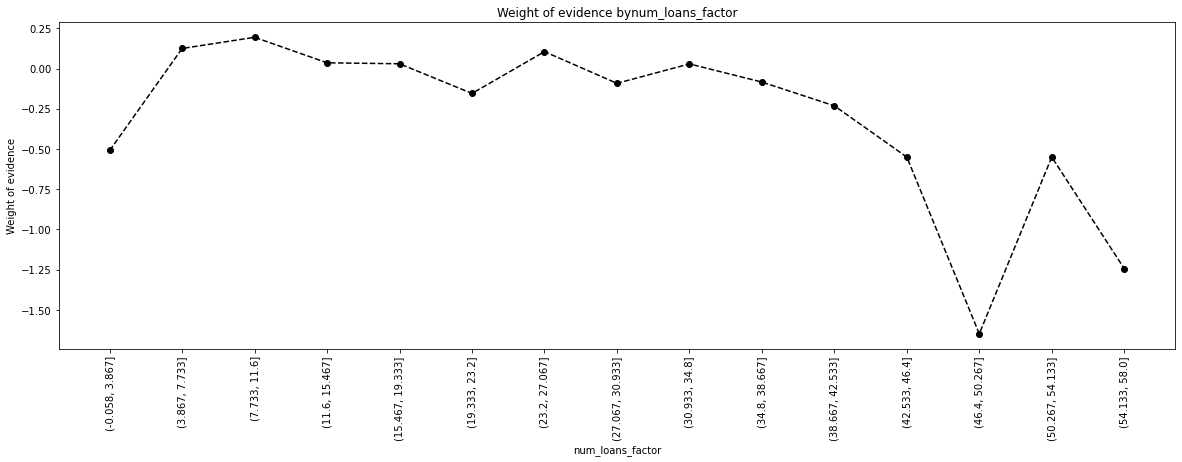

In [389]:
# FIne classing by the weight of evidence and the number of samples

train_data['num_loans_factor'] = pd.cut(train_data['num_loans'], 15)
name_variable = 'num_loans_factor'
woe = woe_continuous(train_data, name_variable)
plot_woe_discrete(woe, name_variable, rotation_xaxis_label = 90)
woe

,expense_ratio_factor,total_number,woe,Number_rate,Number_not_default
0,"(-325.44, 32645.1]",28043,0.026388,0.233692,26203
1,"(-0.001, 0.1]",19623,0.123063,0.163525,18447
2,"(0.1, 0.2]",14109,0.042385,0.117575,13197
3,"(0.2, 0.3]",16184,0.234671,0.134867,15311
4,"(0.3, 0.4]",14499,0.151475,0.120825,13653
5,"(0.4, 0.5]",10587,-0.051574,0.088225,9840
6,"(0.5, 0.6]",6675,-0.311045,0.055625,6077
7,"(0.6, 0.7]",4365,-0.410669,0.036375,3937
8,"(0.7, 0.8]",2734,-0.498210,0.022783,2444
9,"(0.8, 0.9]",1753,-0.557319,0.014608,1557


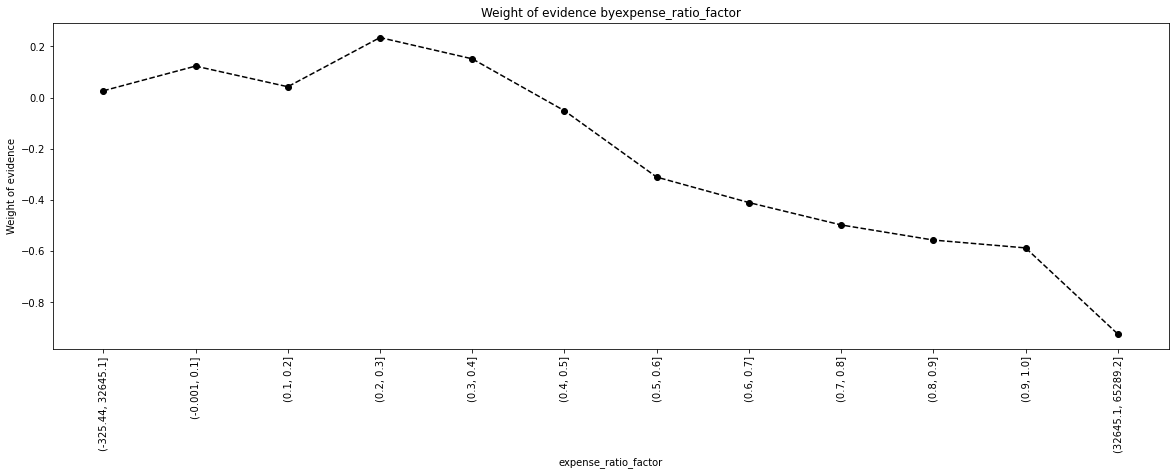

In [390]:
# Fine classing by the weight of evidence and the number of samples
# personal_credit_percentage and expense_ratio

data1 = train_data.query('expense_ratio <= 1').copy()
data2 = train_data.query('expense_ratio > 1').copy()
data1['expense_ratio_factor'] = pd.cut(data1['expense_ratio'], 10)
data2['expense_ratio_factor'] = pd.cut(data2['expense_ratio'], 10)
data3 = pd.concat([data1, data2], axis = 0)

name_variable1 = 'expense_ratio_factor'
woe1 = woe_continuous(data3, name_variable1)
plot_woe_discrete(woe1, name_variable1, rotation_xaxis_label = 90)
woe1

In [62]:
# Creating dummy variables and reference variables after coarse classing

dummy_category = ['num_dependents:0', 'num_dependents:1_3', 'num_dependents:4', 'num_dependents:5_13', 
                  'A60_90_Counter:0', 'A60_90_Counter:1', 'A60_90_Counter:2_5', 'A60_90_Counter:6_98', 
                  'A30_60_Counter:0', 'A30_60_Counter:1', 'A30_60_Counter:2', 'A30_60_Counter:3_6', 'A30_60_Counter:7_98',
                  'A90_more_Counter:0', 'A90_more_Counter:1', 'A90_more_Counter:2_4', 'A90_more_Counter:5_98', 
                  'num_home_loans:0', 'num_home_loans:1', 'num_home_loans:2_4', 'num_home_loans:5_7', 'num_home_loans:8_54', 
                  'income:0_3k', 'income:3k_6k', 'income:6k_9k', 'income:9k_21k', 'income:21k_3000k',
                  'personal_credit_percentage:larger1', 'personal_credit_percentage:0_0.1', 'personal_credit_percentage:0.1_0.2',
                  'personal_credit_percentage:0.2_0.3', 'personal_credit_percentage:0.3_0.4', 'personal_credit_percentage:0.4_0.5',
                  'personal_credit_percentage:0.5_0.6', 'personal_credit_percentage:0.6_0.7', 'personal_credit_percentage:0.7_0.8',
                  'personal_credit_percentage:0.8_0.9', 'personal_credit_percentage:0.9_1.0',
                  'expense_ratio:larger1', 'expense_ratio:0_0.1', 'expense_ratio:0.1_0.2', 'expense_ratio:0.2_0.3', 
                  'expense_ratio:0.3_0.4', 'expense_ratio:0.4_0.5', 'expense_ratio:0.5_1.0',
                  'age:21_29', 'age:30_38', 'age:39_47', 'age:48_56', 'age:57_65', 'age:66_73', 'age:74_109',
                  'num_loans:0_3', 'num_loans:4_11', 'num_loans:12_23', 'num_loans:24_58'
                  ]
                  
reference_category = ['num_dependents:5_13', 'A60_90_Counter:6_98', 'A30_60_Counter:7_98', 
                      'A90_more_Counter:5_98','num_home_loans:8_54', 'income:21k_3000k', 
                      'expense_ratio:0.5_1.0', 'personal_credit_percentage:larger1',
                      'age:21_29', 'num_loans:24_58' 
                     ]

In [403]:
# Transform the original train data into new train data with dummy variables
#final_train_data = train_data[['PD_2years']].copy()
#train_data1 = train_data.copy()

# Transform the orginal test data into new test data with dummy variables
final_train_data = test_data[['PD_2years']].copy()
train_data1 = test_data.copy()

In [404]:
# dummy variables for num_dependents

final_train_data['num_dependents:0'] = np.where(train_data1['num_dependents'].isin([0]), 1, 0)
final_train_data['num_dependents:1_3'] = np.where(train_data1['num_dependents'].isin(np.arange(1, 4)), 1, 0)
final_train_data['num_dependents:4'] = np.where(train_data1['num_dependents'].isin([4]), 1, 0)
final_train_data['num_dependents:5_13'] = np.where(train_data1['num_dependents'].isin(np.arange(5, 14)), 1, 0)                                                  

In [405]:
# dummy variables for A60_90_Counter

final_train_data['A60_90_Counter:0'] = np.where(train_data1['A60_90_Counter'].isin([0]), 1, 0)
final_train_data['A60_90_Counter:1'] = np.where(train_data1['A60_90_Counter'].isin([1]), 1, 0)
final_train_data['A60_90_Counter:2_5'] = np.where(train_data1['A60_90_Counter'].isin(np.arange(2, 6)), 1, 0)
final_train_data['A60_90_Counter:6_98'] = np.where(train_data1['A60_90_Counter'].isin(np.arange(6, 99)), 1, 0)

In [406]:
# dummy variables for A30_60_Counter

final_train_data['A30_60_Counter:0'] = np.where(train_data1['A30_60_Counter'].isin([0]), 1, 0)
final_train_data['A30_60_Counter:1'] = np.where(train_data1['A30_60_Counter'].isin([1]), 1, 0)
final_train_data['A30_60_Counter:2'] = np.where(train_data1['A30_60_Counter'].isin([2]), 1, 0)
final_train_data['A30_60_Counter:3_6'] = np.where(train_data1['A30_60_Counter'].isin(np.arange(3, 7)), 1, 0)
final_train_data['A30_60_Counter:7_98'] = np.where(train_data1['A30_60_Counter'].isin(np.arange(7, 99)), 1, 0)

In [407]:
# dummy variables for A90_more_Counter

final_train_data['A90_more_Counter:0'] = np.where(train_data1['A90_more_Counter'].isin([0]), 1, 0)
final_train_data['A90_more_Counter:1'] = np.where(train_data1['A90_more_Counter'].isin([1]), 1, 0)
final_train_data['A90_more_Counter:2_4'] = np.where(train_data1['A90_more_Counter'].isin(np.arange(2, 5)), 1, 0)
final_train_data['A90_more_Counter:5_98'] = np.where(train_data1['A90_more_Counter'].isin(np.arange(5, 99)), 1, 0)

In [408]:
# dummy variables for num_home_loans

final_train_data['num_home_loans:0'] = np.where(train_data1['num_home_loans'].isin([0]), 1, 0)
final_train_data['num_home_loans:1'] = np.where(train_data1['num_home_loans'].isin([1]), 1, 0)
final_train_data['num_home_loans:2_4'] = np.where(train_data1['num_home_loans'].isin(np.arange(2, 5)), 1, 0)
final_train_data['num_home_loans:5_7'] = np.where(train_data1['num_home_loans'].isin(np.arange(5, 8)), 1, 0)
final_train_data['num_home_loans:8_54'] = np.where(train_data1['num_home_loans'].isin(np.arange(8, 55)), 1, 0)

In [409]:
# dummy variables for num_loans

final_train_data['num_loans:0_3'] = np.where(train_data1['num_loans'].isin(np.arange(4)), 1, 0)
final_train_data['num_loans:4_11'] = np.where(train_data1['num_loans'].isin(np.arange(4, 12)), 1, 0)
final_train_data['num_loans:12_23'] = np.where(train_data1['num_loans'].isin(np.arange(12, 24)), 1, 0)
final_train_data['num_loans:24_58'] = np.where(train_data1['num_loans'].isin(np.arange(24, 59)), 1, 0)

In [410]:
# dummy variables for age

final_train_data['age:21_29'] = np.where(train_data1['age'].isin(np.arange(21, 30)), 1, 0)
final_train_data['age:30_38'] = np.where(train_data1['age'].isin(np.arange(30, 39)), 1, 0)
final_train_data['age:39_47'] = np.where(train_data1['age'].isin(np.arange(39, 48)), 1, 0)
final_train_data['age:48_56'] = np.where(train_data1['age'].isin(np.arange(48, 57)), 1, 0)
final_train_data['age:57_65'] = np.where(train_data1['age'].isin(np.arange(57, 66)), 1, 0)
final_train_data['age:66_73'] = np.where(train_data1['age'].isin(np.arange(66, 74)), 1, 0)
final_train_data['age:74_109'] = np.where(train_data1['age'].isin(np.arange(74, 110)), 1, 0)

In [411]:
# dummy variables for income

final_train_data['income:0_3k'] = np.where((train_data1['income'] >= 0) & (train_data1['income'] <= 3000), 1, 0)
final_train_data['income:3k_6k'] = np.where((train_data1['income'] > 3000) & (train_data1['income'] <= 6000), 1, 0)
final_train_data['income:6k_9k'] = np.where((train_data1['income'] > 6000) & (train_data1['income'] <= 9000), 1, 0)
final_train_data['income:9k_21k'] = np.where((train_data1['income'] > 9000) & (train_data1['income'] <= 21000), 1, 0)
final_train_data['income:21k_3000k'] = np.where((train_data1['income'] > 21000) & (train_data1['income'] <= 3000000), 1, 0)

In [412]:
# dummy variables for expense_ratio

final_train_data['expense_ratio:larger1'] = np.where((train_data1['expense_ratio'] > 1.0), 1, 0)
final_train_data['expense_ratio:0_0.1'] = np.where(((train_data1['expense_ratio'] >= 0) & (train_data1['expense_ratio'] <= 0.1)), 1, 0)
final_train_data['expense_ratio:0.1_0.2'] = np.where(((train_data1['expense_ratio'] > 0.1) & (train_data1['expense_ratio'] <= 0.2)), 1, 0)
final_train_data['expense_ratio:0.2_0.3'] = np.where(((train_data1['expense_ratio'] > 0.2) & (train_data1['expense_ratio'] <= 0.3)), 1, 0)
final_train_data['expense_ratio:0.3_0.4'] = np.where(((train_data1['expense_ratio'] > 0.3) & (train_data1['expense_ratio'] <= 0.4)), 1, 0)
final_train_data['expense_ratio:0.4_0.5'] = np.where(((train_data1['expense_ratio'] > 0.4) & (train_data1['expense_ratio'] <= 0.5)), 1, 0)
final_train_data['expense_ratio:0.5_1.0'] = np.where(((train_data1['expense_ratio'] > 0.5) & (train_data1['expense_ratio'] <= 1.0)), 1, 0)

In [413]:
# dummy variables for personal_credit_percentage

final_train_data['personal_credit_percentage:larger1'] = np.where((train_data1['personal_credit_percentage'] > 1.0), 1, 0)
final_train_data['personal_credit_percentage:0_0.1'] = np.where(((train_data1['personal_credit_percentage'] >= 0) & (train_data1['personal_credit_percentage'] <= 0.1)), 1, 0)
final_train_data['personal_credit_percentage:0.1_0.2'] = np.where(((train_data1['personal_credit_percentage'] > 0.1) & (train_data1['personal_credit_percentage'] <= 0.2)), 1, 0)
final_train_data['personal_credit_percentage:0.2_0.3'] = np.where(((train_data1['personal_credit_percentage'] > 0.2) & (train_data1['personal_credit_percentage'] <= 0.3)), 1, 0)
final_train_data['personal_credit_percentage:0.3_0.4'] = np.where(((train_data1['personal_credit_percentage'] > 0.3) & (train_data1['personal_credit_percentage'] <= 0.4)), 1, 0)
final_train_data['personal_credit_percentage:0.4_0.5'] = np.where(((train_data1['personal_credit_percentage'] > 0.4) & (train_data1['personal_credit_percentage'] <= 0.5)), 1, 0)
final_train_data['personal_credit_percentage:0.5_0.6'] = np.where(((train_data1['personal_credit_percentage'] > 0.5) & (train_data1['personal_credit_percentage'] <= 0.6)), 1, 0)
final_train_data['personal_credit_percentage:0.6_0.7'] = np.where(((train_data1['personal_credit_percentage'] > 0.6) & (train_data1['personal_credit_percentage'] <= 0.7)), 1, 0)
final_train_data['personal_credit_percentage:0.7_0.8'] = np.where(((train_data1['personal_credit_percentage'] > 0.7) & (train_data1['personal_credit_percentage'] <= 0.8)), 1, 0)
final_train_data['personal_credit_percentage:0.8_0.9'] = np.where(((train_data1['personal_credit_percentage'] > 0.8) & (train_data1['personal_credit_percentage'] <= 0.9)), 1, 0)
final_train_data['personal_credit_percentage:0.9_1.0'] = np.where(((train_data1['personal_credit_percentage'] > 0.9) & (train_data1['personal_credit_percentage'] <= 1.0)), 1, 0)


In [414]:
# Copy the data used as the final data

#train_data_final = final_train_data.copy()
test_data_final = final_train_data.copy()

* Feature Selection

In [417]:
# Insert intercept term 
train_data_final.insert(0, 'const', 1.0)

In [418]:
# Using Logistic model in statsmodels for feature selection
import statsmodels.api as sm

x = train_data_final.drop(['PD_2years'], axis = 1)
x = x.drop(reference_category, axis = 1)
y = train_data_final['PD_2years']
result_stats = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.182314
         Iterations 8


In [419]:
result_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              PD_2years   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119953
Method:                           MLE   Df Model:                           46
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.2603
Time:                        15:24:43   Log-Likelihood:                -21878.
converged:                       True   LL-Null:                       -29576.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.6317      0.314     -8.394      0.000      -3.246      -2.017
num_dependents:0                       0.1719      0.143      1.206      0.228      -0.107       0.451
num_dependents:1_3                     0.0922      0.142      0.648      0.517      -0.187       0.371
num_dependents:4                      -0.0722      0.161     -0.448      0.654      -0.388       0.243
A60_90_Counter:0                      -0.0386      0.280     -0.138      0.891      -0.588       0.511
A60_90_Counter:1                      -0.9587      0.281     -3.417      0.001      -1.509      -0.409
A60_90_Counter:2_5                    -1.1543      0.282     -4.086      0.000      -1.708      -0.601
A30_60_Counter:0                       0.6119      0.242      2.534      0.011       0.139       1.085
A30_60_Counter:1                      -0.1714      0.242     -0.708      0.479      -0.646       0.303
A30_60_Counter:2                      -0.4994      0.244     -2.047      0.041      -0.978      -0.021
A30_60_Counter:3_6                    -0.7489      0.244     -3.065      0.002      -1.228      -0.270
A90_more_Counter:0                     2.1103      0.144     14.684      0.000       1.829       2.392
A90_more_Counter:1                     0.7984      0.147      5.446      0.000       0.511       1.086
A90_more_Counter:2_4                   0.2816      0.150      1.879      0.060      -0.012       0.575
num_home_loans:0                       1.0178      0.200      5.092      0.000       0.626       1.410
num_home_loans:1                       1.2612      0.197      6.388      0.000       0.874       1.648
num_home_loans:2_4                     1.0807      0.196      5.515      0.000       0.697       1.465
num_home_loans:5_7                     0.1613      0.217      0.743      0.458      -0.264       0.587
num_loans:0_3                          0.5012      0.122      4.108      0.000       0.262       0.740
num_loans:4_11                         0.4979      0.115      4.325      0.000       0.272       0.724
num_loans:12_23                        0.1493      0.115      1.300      0.194      -0.076       0.374
age:30_38                              0.0592      0.054      1.097      0.273      -0.047       0.165
age:39_47                              0.1463      0.055      2.684      0.007       0.039       0.253
age:48_56                              0.2785      0.055      5.045      0.000       0.170       0.387
age:57_65                              0.5382      0.059      9.116      0.000       0.423       0.654
age:66_73                              0.7443      0.075      9.912      0.000       0.597       0.891
age:74_109                             0.7270      0.086      8.418      0.000       0.558       0.896
income:0_3k                           -0.2433      0.141     -1.725      0.085      -0.520       0.033
income:3k_6k                          -0.3357   

In [546]:
# Reomve num_dependents because pvalues are all larger than 0.5

x1 = x.drop(['num_dependents:0', 'num_dependents:1_3','num_dependents:4'], axis = 1)
y1 = train_data_final['PD_2years']
result_stats1 = sm.Logit(y1, x1).fit()

Optimization terminated successfully.
         Current function value: 0.182373
         Iterations 8


In [547]:
result_stats1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              PD_2years   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119956
Method:                           MLE   Df Model:                           43
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.2600
Time:                        20:31:57   Log-Likelihood:                -21885.
converged:                       True   LL-Null:                       -29576.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.5003      0.281     -8.906      0.000      -3.051      -1.950
A60_90_Counter:0                      -0.0423      0.281     -0.151      0.880      -0.592       0.508
A60_90_Counter:1                      -0.9619      0.281     -3.423      0.001      -1.513      -0.411
A60_90_Counter:2_5                    -1.1605      0.283     -4.103      0.000      -1.715      -0.606
A30_60_Counter:0                       0.6104      0.242      2.526      0.012       0.137       1.084
A30_60_Counter:1                      -0.1751      0.242     -0.723      0.470      -0.650       0.300
A30_60_Counter:2                      -0.5028      0.244     -2.059      0.039      -0.981      -0.024
A30_60_Counter:3_6                    -0.7528      0.244     -3.079      0.002      -1.232      -0.274
A90_more_Counter:0                     2.1096      0.144     14.685      0.000       1.828       2.391
A90_more_Counter:1                     0.7949      0.147      5.425      0.000       0.508       1.082
A90_more_Counter:2_4                   0.2775      0.150      1.852      0.064      -0.016       0.571
num_home_loans:0                       1.0211      0.200      5.108      0.000       0.629       1.413
num_home_loans:1                       1.2599      0.197      6.380      0.000       0.873       1.647
num_home_loans:2_4                     1.0781      0.196      5.501      0.000       0.694       1.462
num_home_loans:5_7                     0.1593      0.217      0.734      0.463      -0.266       0.585
num_loans:0_3                          0.5039      0.122      4.131      0.000       0.265       0.743
num_loans:4_11                         0.4983      0.115      4.329      0.000       0.273       0.724
num_loans:12_23                        0.1488      0.115      1.296      0.195      -0.076       0.374
age:30_38                              0.0406      0.054      0.756      0.450      -0.065       0.146
age:39_47                              0.1162      0.054      2.160      0.031       0.011       0.222
age:48_56                              0.2607      0.055      4.746      0.000       0.153       0.368
age:57_65                              0.5387      0.059      9.126      0.000       0.423       0.654
age:66_73                              0.7520      0.075     10.019      0.000       0.605       0.899
age:74_109                             0.7361      0.086      8.529      0.000       0.567       0.905
income:0_3k                           -0.2194      0.141     -1.556      0.120      -0.496       0.057
income:3k_6k                          -0.3215      0.137     -2.346      0.019      -0.590      -0.053
income:6k_9k                          -0.1780      0.138     -1.292      0.196      -0.448       0.092
income:9k_21k                         -0.0907      0.138     -0.657      0.511      -0.362       0.180
expense_ratio:larger1                  0.1216   

* Training and Estimating the model

In [549]:
# Remove the intercept term
x1.drop(['const'], axis = 1, inplace = True)

In [550]:
# Using Logistic model in sklearn for prediction

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, max_iter = 500).fit(x1, y1)

In [555]:
# Transform test data

x_test = test_data_final.drop(['PD_2years', 'num_dependents:0',
                               'num_dependents:1_3','num_dependents:4'], axis = 1)
x_test = x_test.drop(reference_category, axis = 1)

In [556]:
# Predict on the test data

result_lr = lr.predict(x_test)
result_lr_prob = lr.predict_proba(x_test)

In [557]:
# The probability of not default

lr_prob = result_lr_prob[:, 1]

In [558]:
# Model estimation
#1: F1 score
from sklearn.metrics import classification_report as clt
print(clt(y_true = test_data_final['PD_2years'], y_pred = result_lr))

              precision    recall  f1-score   support

           0       0.57      0.21      0.30      1956
           1       0.95      0.99      0.97     28043

    accuracy                           0.94     29999
   macro avg       0.76      0.60      0.64     29999
weighted avg       0.92      0.94      0.92     29999



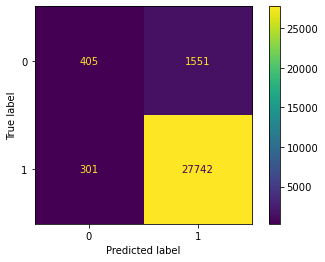

In [560]:
#2: Confusion matrix


from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import confusion_matrix as cm

cm_matrix = cm(test_data_final['PD_2years'], result_lr, labels = [0, 1])
my_cmd = cmd(confusion_matrix = cm_matrix, display_labels = [0, 1])
my_cmd.plot()
plt.show()

In [565]:
#3: False positive rate

print('The false positive rate on the test data is {:0.1f}%'.format(1551 / (1551 + 27742) * 100))

The false positive rate on the test data is 5.3%


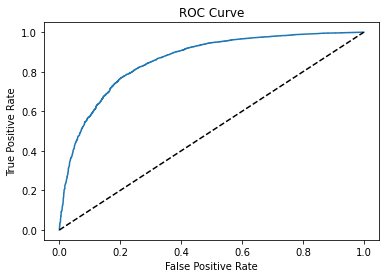

In [562]:
#4: ROC

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(test_data_final['PD_2years'], lr_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [563]:
#5: AUC

my_auc = roc_auc_score(test_data_final['PD_2years'], lr_prob)
print('The auc value on the test data is {:0.2f}'.format(my_auc))

The auc value on the test data is 0.86
